In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading signals

In [2]:
signal_number = 3 # Signal number 1 - 3

delsys_raw =  np.loadtxt("signals/delsys_signal_%s.txt"%signal_number)
delsys = delsys_raw[:,1] - delsys_raw[:,1].mean()

t = delsys_raw[:,0]

dev5_raw = np.loadtxt("signals/dev5_signal_%s.txt"%signal_number)[:,1]
dev5 = dev5_raw - dev5_raw.mean()

delsys_noise_raw =  np.loadtxt("signals/delsys_noise.txt")[:, 1]
delsys_noise = delsys_noise_raw - delsys_noise_raw.mean()

dev5_noise_raw = np.loadtxt("signals/dev5_noise.txt")[:, 1]
dev5_noise = dev5_noise_raw - dev5_noise_raw.mean()

# Signals on time domain

In [3]:
def plot_on_time(delsys, dev5, text=''):
    """Standard way of plotting on time domain."""
    
    y_range = (-0.4, 0.4)
    x_range = (0., 4)
    
    plt.figure(figsize=(20, 10))
    plt.rcParams['font.size'] = 22 
    

    plt.subplot(211)
    plt.title("Delsys Bagnoli-2 %s"%text)
    plt.plot(t, delsys)
    plt.grid()
    plt.ylim(*y_range)
    plt.xlim(*x_range)
    plt.ylabel("Amplitude(V)")
    plt.xlabel("Time(s)")


    plt.subplot(212)
    plt.title("Dev5 %s"%text)
    plt.plot(t, dev5)
    plt.grid()
    plt.ylim(*y_range)
    plt.xlim(*x_range)
    plt.ylabel("Amplitude(V)")
    plt.xlabel("Time(s)")

    plt.tight_layout(pad=1.0)
    plt.show()

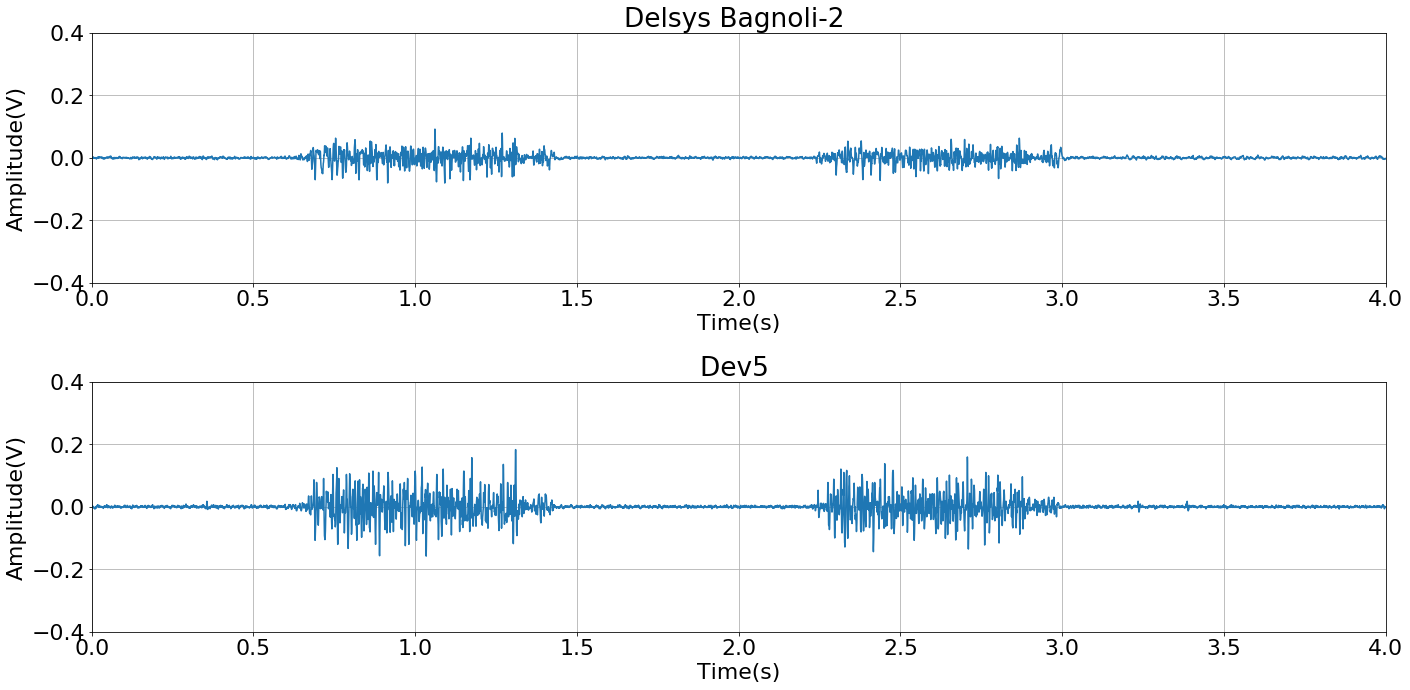

In [4]:
plot_on_time(delsys, dev5)

### Noise

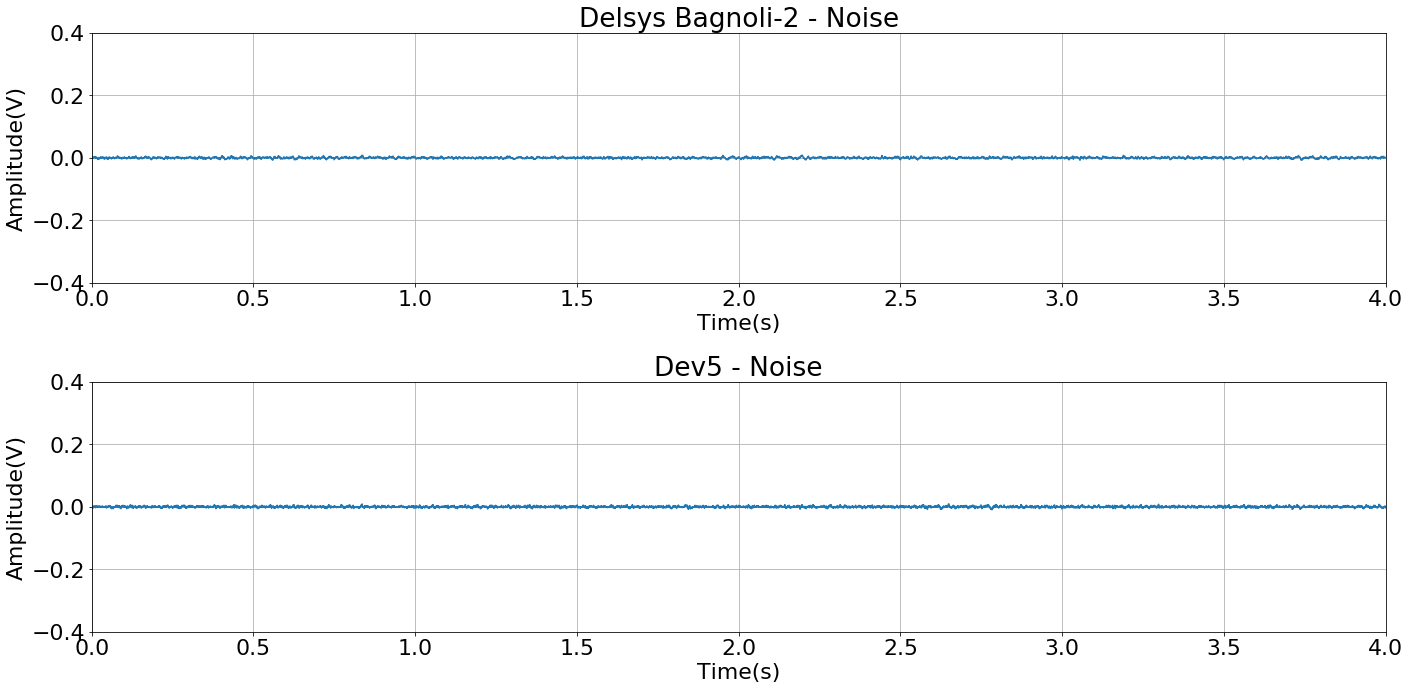

In [5]:
plot_on_time(delsys_noise, dev5_noise, text='- Noise')

# Signals on frequency domain

In [6]:
def plot_on_frequency(delsys, dev5, text=''):
    """Standard way to plot the FFT."""
    
    fs = 2000. #Hz
    t_window = 4. #seconds
    samples = int(fs * t_window)
    frequencies = np.fft.fftfreq(samples)
    F = np.abs(frequencies * fs)

    window = np.fft.fftshift(np.hanning(samples))

    delsys_spectrum =  np.abs(np.fft.fft(delsys)) * window
    dev5_spectrum = np.abs(np. fft.fft(dev5)) * window

    normalized_delsys_spectrum = delsys_spectrum/delsys_spectrum.max()
    normalized_dev5_spectrum = dev5_spectrum/dev5_spectrum.max()

    
    
    
    x_range = (0., 500.) # Hz
    y_range = (0.,1.) # %
    divisions = 11
    spacing = np.linspace(*x_range, num=divisions)

    plt.figure(figsize=(40, 10))
    plt.rcParams['font.size'] = 26 


    plt.subplot(121)
    plt.title("Spectrum Delsys Bagnoli-2 %s"%text)
    plt.plot(F, normalized_delsys_spectrum)
    plt.grid()
    plt.xlim(*x_range)
    plt.xticks(spacing)
    plt.ylim(*y_range)
    plt.ylabel("%Max")
    plt.xlabel("Frequency (Hz)")


    plt.subplot(122)
    plt.title("Spectrum Dev5 %s"%text)
    plt.plot(F, normalized_dev5_spectrum)
    plt.grid()
    plt.xlim(*x_range)
    plt.xticks(spacing)
    plt.ylim(*y_range)
    plt.ylabel("%Max")
    plt.xlabel("Frequency (Hz)")
    
    plt.tight_layout(pad=1.0)
    plt.show()

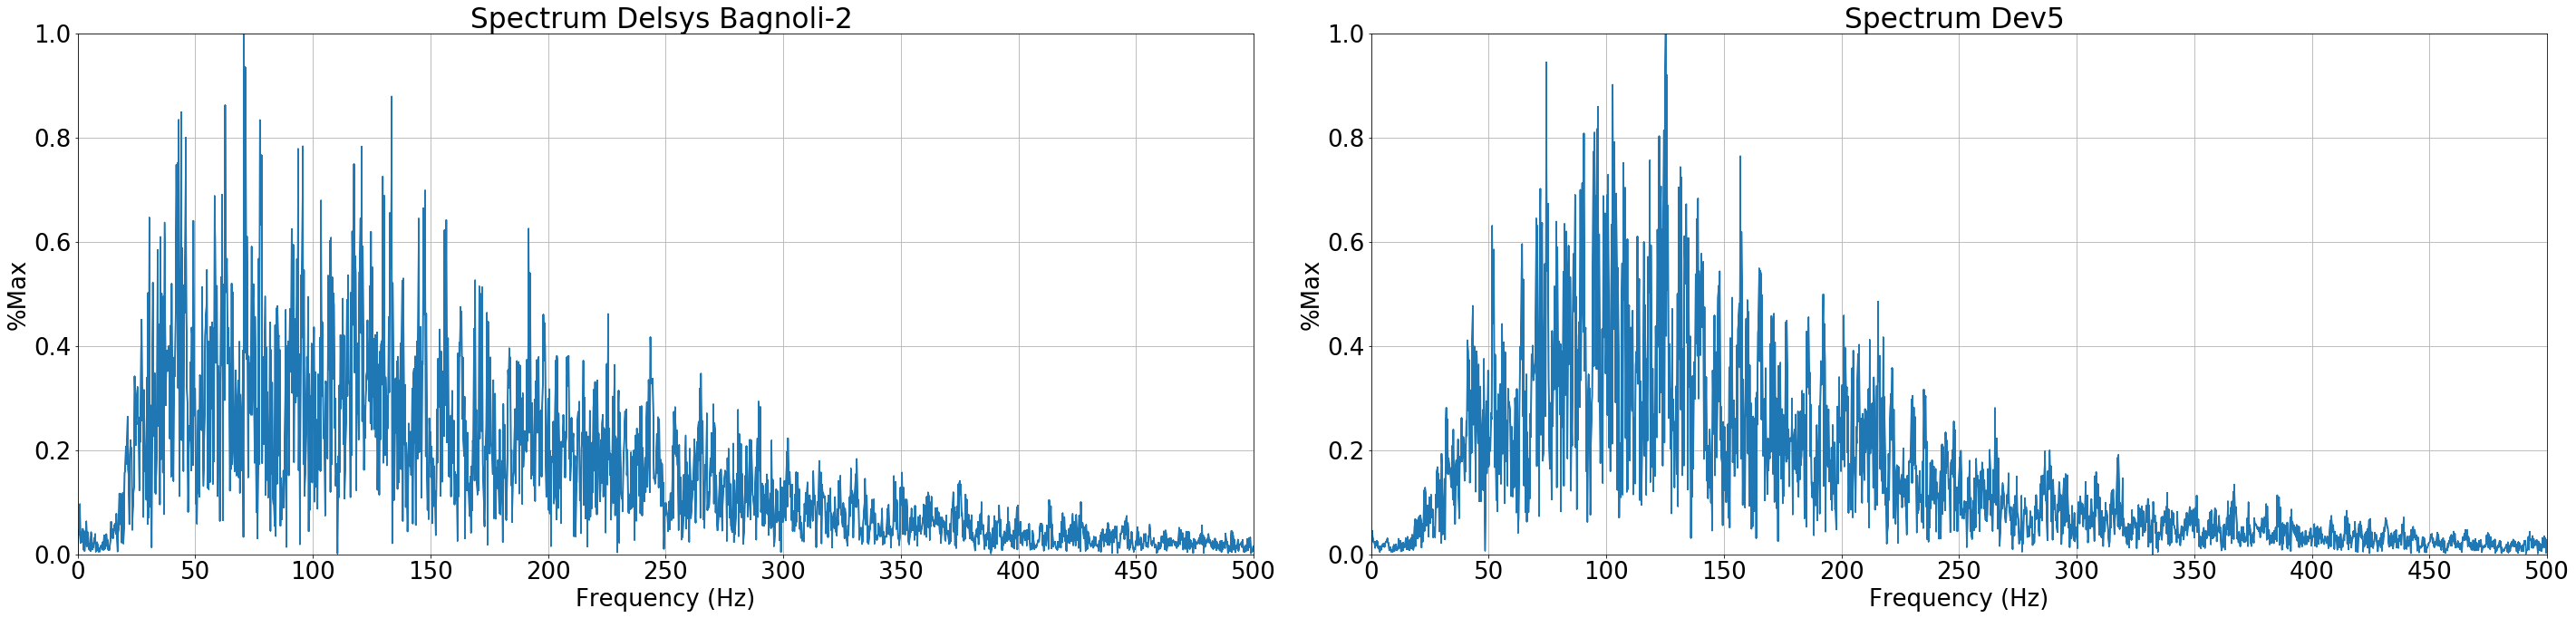

In [7]:
plot_on_frequency(delsys, dev5)

### Noise

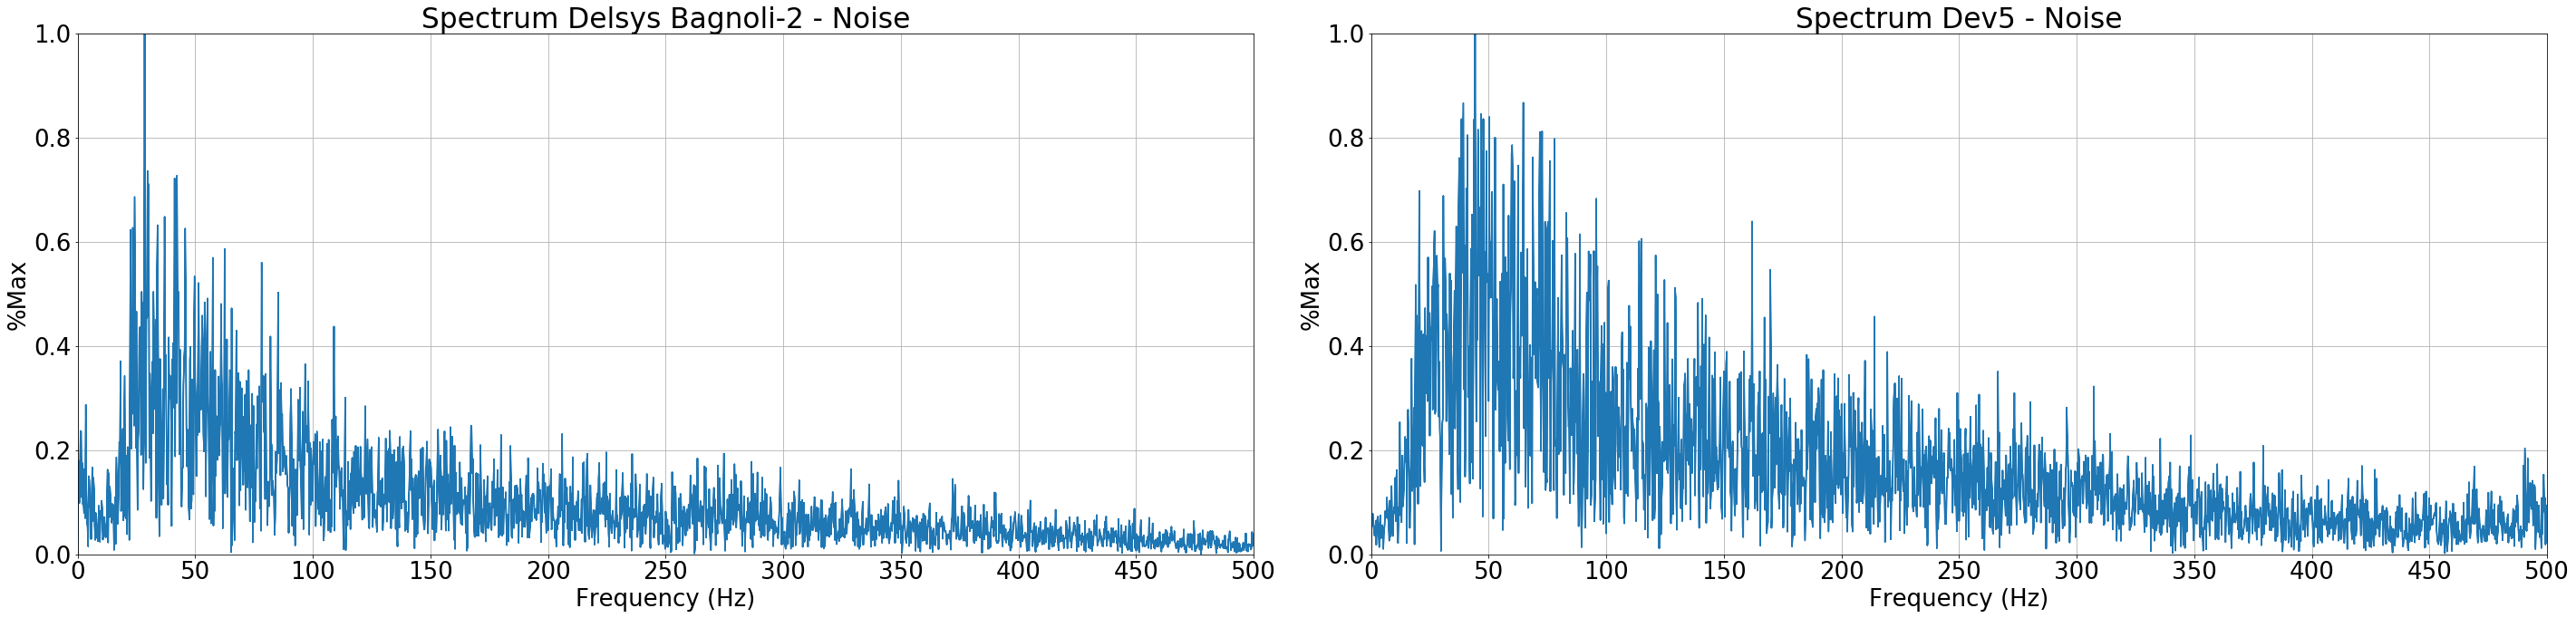

In [8]:
plot_on_frequency(delsys_noise, dev5_noise, '- Noise')

# SNR (signal to noise ratio)

$$
SNR = 20log_{10}\left(\frac{S_{RMS}}{N_{RMS}}\right)
$$


Where,
$S_{RMS}$ is the signal RMS value, and $N_{RMS}$ is the noise RMS value.



##### RMS (root mean square):

$$
x_{RMS} =  \sqrt{\frac{1}{N} \sum_{i=1}^{N}x_{i}^{2}   }
$$

In [9]:
def rms(x_array):
    """Calculates the RMS value for the whole series."""
    
    n = float(x_array.shape[0])
    return  np.sqrt((x_array**2).sum()/n)
snr = lambda  s, n: 20. * np.log10(s/n) 

In [10]:
delsys_rms = rms(delsys)
delsys_noise_rms = rms(delsys_noise)

dev5_rms = rms(dev5)
dev5_noise_rms = rms(dev5_noise)


print('RMS signal Delsys Bagnoli-2: %f V(rms)'%delsys_rms)
print('RMS noise Delsys Bagnoli-2: %f V(rms)'%delsys_noise_rms)

print('\nRMS signal dev5: %f V(rms)'%dev5_rms)
print('RMS noise dev5: %f V(rms)'%dev5_noise_rms)


print("\n\nSNR Delsys Bagnoli-2: %.2f dB" % snr(delsys_rms, delsys_noise_rms ))
print("SNR Dev5 SNR: %.2f dB" % snr(dev5_rms, dev5_noise_rms))

RMS signal Delsys Bagnoli-2: 0.013065 V(rms)
RMS noise Delsys Bagnoli-2: 0.002243 V(rms)

RMS signal dev5: 0.026445 V(rms)
RMS noise dev5: 0.002328 V(rms)


SNR Delsys Bagnoli-2: 15.31 dB
SNR Dev5 SNR: 21.11 dB
